In [41]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [55]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [56]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [57]:
y_train.shape, y_test.shape

((60000,), (10000,))

Text(0.5, 1.0, 'class 5')

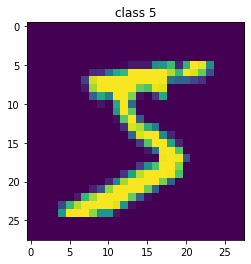

In [58]:
# visualization
plt.imshow(x_train[0])
plt.title('class'+ ' '+str(y_train[0]))

Text(0.5, 1.0, 'class 5')

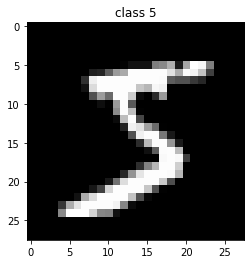

In [59]:
# visualization
plt.imshow(x_train[0], cmap = 'gray')
plt.title('class'+ ' '+str(y_train[0]))

In [60]:
# processing to tensorflow
x_train_processed = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_processed = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [61]:
# change the type
x_train_processed = x_train_processed.astype('float32')
x_test_processed = x_test_processed.astype('float32')

In [62]:
# normalization 
x_train_processed /= 255
x_test_processed /= 255

In [63]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
y_train_processed = np_utils.to_categorical(y_train, 10) # 10 because we have 10 classes
y_test_processed = np_utils.to_categorical(y_test, 10) # 10 because we have 10 classes

In [65]:
y_train_processed

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
x_test_processed.shape

(10000, 28, 28, 1)

In [22]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1))) # 32 = kernel numbers, (3,3) is the shape kernel
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu')) # 32 = kernel numbers, (3,3) is the shape kernel
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax')) # 10 because the variable target there's 10 outputs

In [23]:
model.compile (loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [24]:
# validation_data show the model performance in test data
model.fit(x_train_processed, y_train_processed, batch_size = 128, epochs = 5, validation_data = (x_test_processed, y_test_processed))

Epoch 1/5
469/469 [==============================] - 58s 122ms/step - loss: 0.2140 - accuracy: 0.9334 - val_loss: 0.0896 - val_accuracy: 0.9765
Epoch 2/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0707 - accuracy: 0.9788 - val_loss: 0.0516 - val_accuracy: 0.9836
Epoch 3/5
469/469 [==============================] - 52s 111ms/step - loss: 0.0529 - accuracy: 0.9844 - val_loss: 0.0372 - val_accuracy: 0.9878
Epoch 4/5
469/469 [==============================] - 54s 114ms/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 5/5
469/469 [==============================] - 53s 112ms/step - loss: 0.0337 - accuracy: 0.9892 - val_loss: 0.0344 - val_accuracy: 0.9896


In [ ]:
accuracy = model.evaluate(x_test_processed, y_test_processed)

313/313 [==============================] - 1s 4ms/step - loss: 0.0472 - accuracy: 0.9852


In [54]:
## Data Augmentation

In [39]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28,28,1))) # 32 = kernel numbers, (3,3) is the shape kernel
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax')) # 10 because the variable target there's 10 outputs

In [40]:
model.compile (loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])

In [74]:
generator_train = ImageDataGenerator(rotation_range = 7, horizontal_flip = True, 
                               shear_range = 0.2,
                               height_shift_range=0.07,
                               zoom_range = 0.2)

In [75]:
generator_test = ImageDataGenerator()

In [77]:
new_base_train = generator.flow(x_train_processed, y_train_processed, batch_size = 128)
new_base_test = generator.flow(x_test_processed, y_test_processed, batch_size = 128)

In [79]:
# steps per epoch = number of amostras generate by generator before start a new epoch, number of images / batch_size
model.fit_generator(new_base_train, steps_per_epoch = 60000/128, epochs = 5, validation_data= new_base_test, validation_steps = 10000/128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
468/468 [==============================] - 40s 84ms/step - loss: 0.5661 - accuracy: 0.8227 - val_loss: 0.2709 - val_accuracy: 0.9176
Epoch 2/5
468/468 [==============================] - 42s 90ms/step - loss: 0.2374 - accuracy: 0.9272 - val_loss: 0.1898 - val_accuracy: 0.9388
Epoch 3/5
468/468 [==============================] - 39s 83ms/step - loss: 0.1855 - accuracy: 0.9441 - val_loss: 0.1525 - val_accuracy: 0.9500
Epoch 4/5
468/468 [==============================] - 39s 84ms/step - loss: 0.1590 - accuracy: 0.9505 - val_loss: 0.1443 - val_accuracy: 0.9552
Epoch 5/5
468/468 [==============================] - 41s 87ms/step - loss: 0.1450 - accuracy: 0.9550 - val_loss: 0.1364 - val_accuracy: 0.9573
